In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from modules.minisom import MiniSom

In [2]:
data = pd.read_csv("data/Credit_Card_Applications.csv")
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
X = data.drop(["Class"],axis=1)
y = data["Class"]

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = scaler.transform(X)

In [5]:
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(X,100)

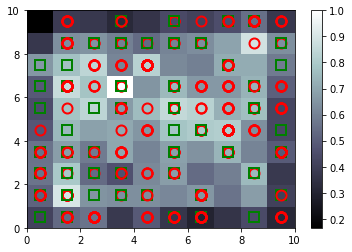

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X,0):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor="None",
         markersize=10,
         markeredgewidth=2)
show()

In [14]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,6)], mappings[(8,8)]), axis = 0)
frauds = scaler.inverse_transform(frauds)

In [15]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15638610
15649160
15636521
15632789
15567834
15591035
15598614
15608804
15631267
15572361
15605872
